First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


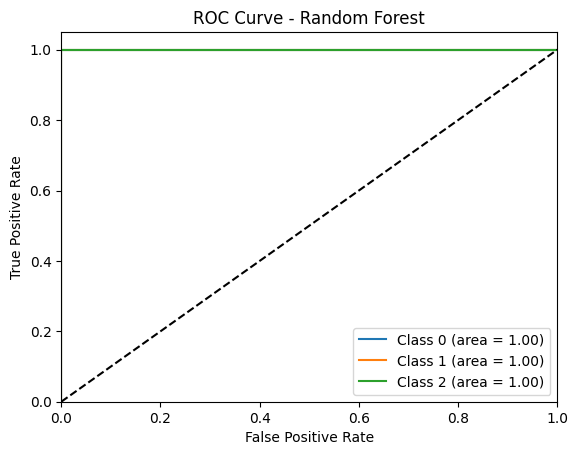

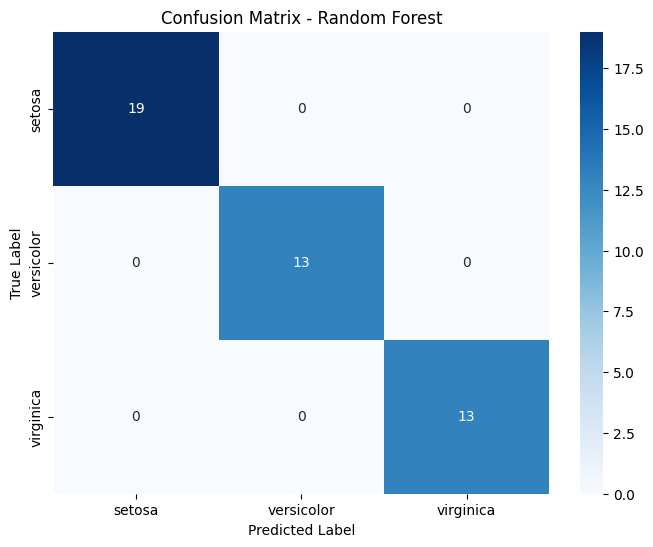

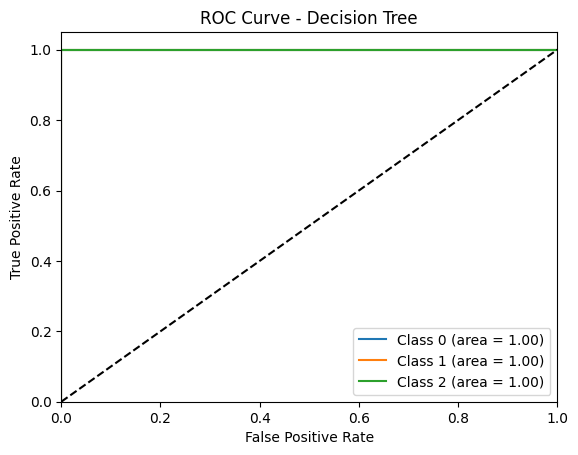

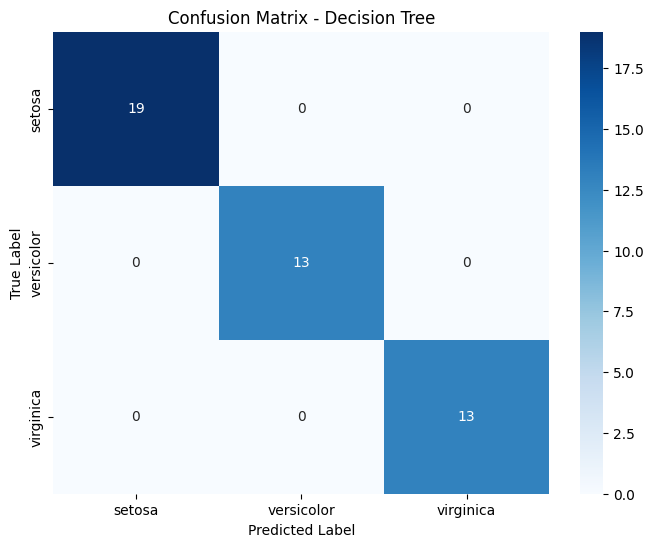

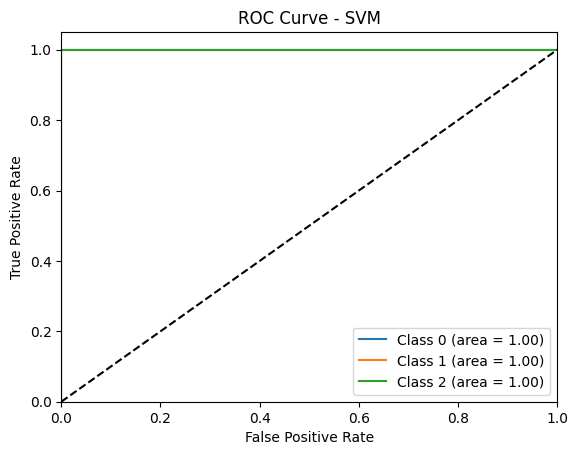

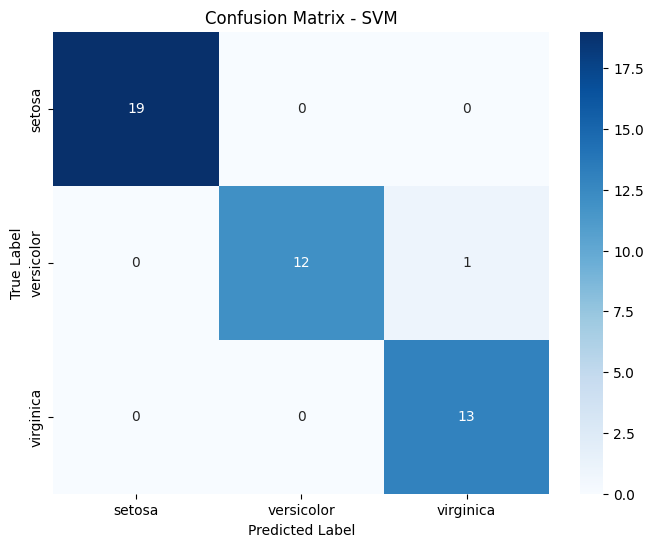

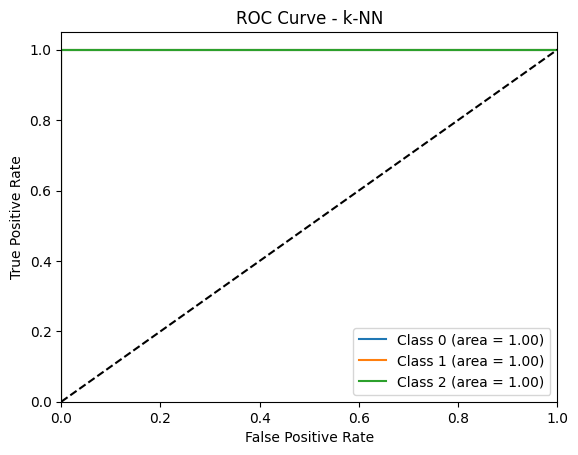

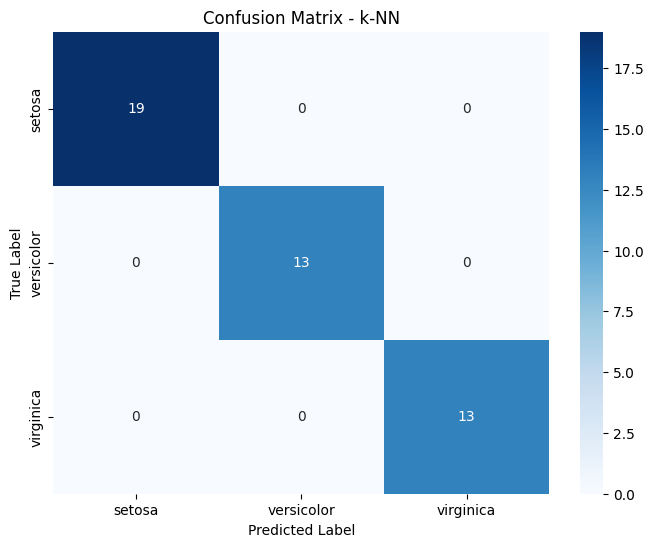

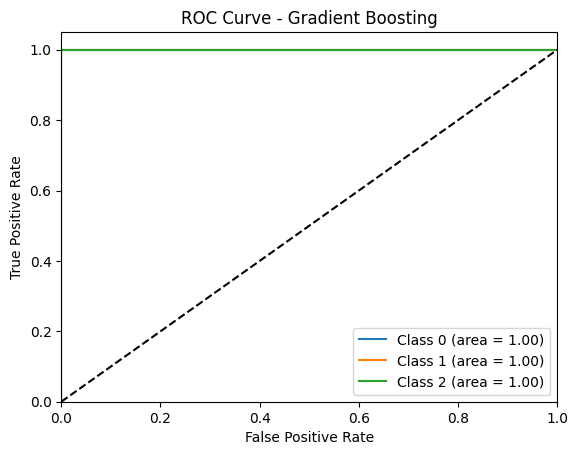

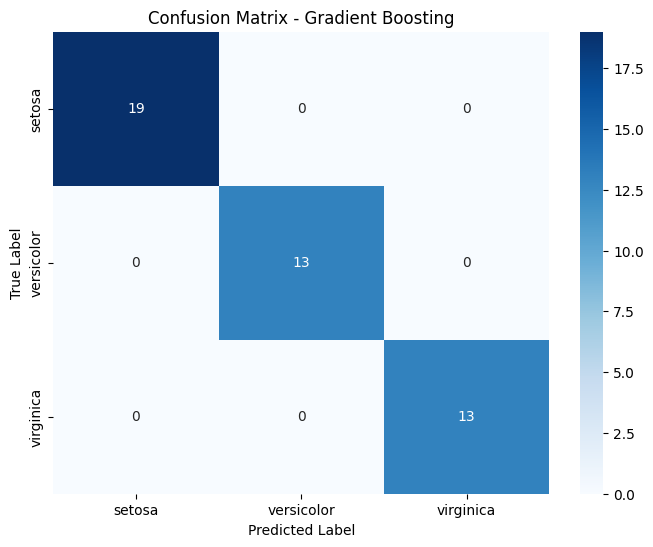

Model: Random Forest
Best Parameters: {'max_depth': None, 'n_estimators': 50}
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00

Model: Decision Tree
Best Parameters: {'max_depth': None}
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00

Model: SVM
Best Parameters: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
ROC AUC: 1.00

Model: k-NN
Best Parameters: {'n_neighbors': 3}
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00

Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00

The best classifier is: Random Forest


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display the first few rows of the dataset
print("First few rows of the Iris dataset:")
print(iris_df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),  
    "k-NN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Hyperparameter tuning parameters
param_grids = {
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "Decision Tree": {'max_depth': [None, 10, 20, 30]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "k-NN": {'n_neighbors': [3, 5, 7]},
    "Gradient Boosting": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]}
}

# Initialize results dictionary
results = {}

# Train and evaluate each model
for name, clf in classifiers.items():
    # Hyperparameter tuning
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Best estimator
    best_clf = grid_search.best_estimator_
    
    # Predict on test set
    y_pred = best_clf.predict(X_test)
    y_prob = best_clf.predict_proba(X_test)  # Get probabilities for all classes
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
   
    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        
        # Plot ROC Curve
        fpr = {}
        tpr = {}
        roc_auc_curve = {}
        n_classes = len(np.unique(y))
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
            roc_auc_curve[i] = roc_auc_score(y_test == i, y_prob[:, i])
        
        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc_curve[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Store results
    results[name] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.2f}\n")

# Determine the best classifier based on performance metrics
best_model = max(results, key=lambda x: (results[x]['Accuracy'], results[x]['Precision'], results[x]['Recall'], results[x]['F1 Score'], results[x]['ROC AUC']))

print(f"The best classifier is: {best_model}")
